In [2]:
#constants and cosmological parameters
c= 299792458. #speed of light in m/s (SI units)
G=6.67408e-11  #Newton constant, in m^3/s^2/kg (SI units)
mu_0 = 1.25663706212e-6 # vacuum permeability (H/m)
M_sun = 1.98847e30 #solar mass in kg
yr = 86400*365.25 #1 year
pc_to_light_year = 3.26156 #parsec in light years
pc_to_m = pc_to_light_year*c*86400*365.25 #parsec in SI
mpc_to_m = pc_to_m*1e6

H0 = 67.*1e3/(1e6*pc_to_m) #Hubble's parameter today
h0 = 0.67

Om_m = 0.12/h0**2
Om_r = 2.47e-5/h0**2
Om_k = 0.
Om_L = 1-Om_m-Om_r

print(Om_m, Om_r, Om_k, Om_L)

0.2673201158387168 5.502339051013588e-05 0.0 0.732624860770773


## Slow-roll Inflation
Equation (140) from Caprini-Figueroa review (arXiv): 
\begin{equation}
\Omega_{\rm gw}(f) = \frac{3}{128}\, \Omega_{\rm rad}\, r\, \mathcal{P}_{\mathcal{R}}\, \left(\frac{f}{f_{*}}\right)^{n_{T}}\, \left[\frac{1}{2}\, \left(\frac{f_{\rm eq}}{f}\right)^{2} + \frac{16}{9}\right],
\end{equation}

where $\mathcal{P}_{\mathcal{R}} \simeq 2\times 10^{-9}$ is the primordial curvature power spectrum amplitude at the pivot scale $k_{*} = 0.05 {\rm Mpc^{-1}}$, $n_{T} = 0$, $r$ the tensor-to-scalar ratio, $f= k_{*}/(2\pi a_{0})$ ($a_{0}=1$?), $f_{\rm eq}=H_{0} \Omega_{\rm mat}/\pi\sqrt{2\, \Omega_{\rm rad}})$.

($n_{T}=-r/8$ for the red-tilted spectrum, $n_{T}=0$ for the Planck+BICEP2+Keck Array data $r_{0.05}= \frac{\mathcal{P}_{\mathcal{h}}}{\mathcal{P}_{\mathcal{R}}}\leq 0.07$ at $95\%$ c.l., and $n_{T}=0.15$ for blue-tilted spectrum).

In [3]:
def Om_gw_inflation(f, r=0.07, n_T=0., P_R = 2e-9, k_star = 0.05/mpc_to_m, a0=1.):
    
    pre_fact = 3./128.*Om_r*r*P_R
    
    f_star = c*k_star/(2*np.pi*a0)
    print(f_star)
    f_eq = H0*Om_m/(np.pi*np.sqrt(2*Om_r))
    
    freq_part = np.power(f/f_star, n_T)*(0.5*np.square(f_eq/f)+16./9.)
    
    return pre_fact*freq_part

In [4]:
freqs = np.logspace(np.log10(3.4e-19),4, 251)
freqs_CMB_bound = np.logspace(np.log10(3.4e-19), np.log10(2.1e-17), 101)
Om_red_f = Om_gw_inflation(f=freqs, r=0.07, n_T=-0.07/8, P_R = 2e-9, k_star = 0.05/mpc_to_m, a0=1.)
Om_blue_f = Om_gw_inflation(f=freqs, r=0.07, n_T=0.15, P_R = 2e-9, k_star = 0.05/mpc_to_m, a0=1.)
Om_CMB_f = Om_gw_inflation(f=freqs_CMB_bound, r=0.07, n_T = 0., P_R = 2e-9, k_star = 0.05/mpc_to_m, a0=1.)

np.savez("Om_GW_inflation_caprini_figueroa.npz", freqs = freqs, freqs_CMB_bound = freqs_CMB_bound,\
         Om_red_f=Om_red_f, Om_blue_f=Om_blue_f, Om_CMB_f = Om_CMB_f)

7.731447241094385e-17
7.731447241094385e-17
7.731447241094385e-17


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


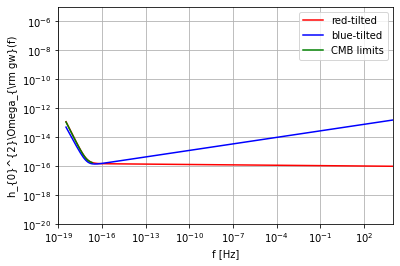

In [5]:
plt.loglog(freqs, Om_red_f*h0**2, label ="red-tilted", color = "red")
plt.loglog(freqs, Om_blue_f*h0**2, label ="blue-tilted", color = "blue")
plt.loglog(freqs_CMB_bound, Om_CMB_f*h0**2, label ="CMB limits", color = "green")
plt.xlabel("f [Hz]")
plt.ylabel(r"h_{0}^{2}\Omega_{\rm gw}(f)")
plt.xlim(1e-19, 1e4)
plt.ylim(1e-20, 1e-5)
plt.grid(which = "both")
plt.legend()

plt.savefig("Om_gw_inflation.pdf")
plt.savefig("Om_gw_inflation.svg")
plt.savefig("Om_gw_inflation.eps")
plt.show()

## FOPT: sound waves
From https://arxiv.org/pdf/1512.06239.pdf
\begin{equation}
h_{0}^{2} \Omega_{\rm sw} (f) = 2.65\times 10^{-6} \left(\frac{H_{*}}{\beta}\right) \left(\frac{\kappa_{v}\alpha}{1+\alpha}\right)^{2}\left(\frac{100}{g_{*}}\right)^{1/3} v_{w} S_{\rm sw}(f)
\end{equation}

$v_{w}$ sound-wave speed, $\kappa_{v}$ fraction of latent heat transformed into bulk motion of the fluid.

\begin{equation}
S_{\rm sw} (f) = (f/f_{\rm sw})^{3} \left(\frac{7}{4+3(f/f_{\rm sw})^{2}}\right)^{7/2}
\end{equation}

Peak frequency 
\begin{equation}
f_{\rm sw} = 1.9 \times 10^{-5} {\rm Hz} \frac{1}{v_{w}} \left(\frac{\beta}{H_{*}}\right) \left(\frac{T_{*}}{100 {\rm GeV}}\right) \left(\frac{g_{*}}{100}\right)^{1/6}
\end{equation}

## FOPT: MHD turbolences
\begin{equation}
h_{0}^{2} \Omega_{\rm sw} (f) = 3.35\times 10^{-4} \left(\frac{H_{*}}{\beta}\right) \left(\frac{\kappa_{\rm turb}\alpha}{1+\alpha}\right)^{3/2}\left(\frac{100}{g_{*}}\right)^{1/3} v_{w} S_{\rm turb}(f)
\end{equation}

\begin{equation}
S_{\rm turb} (f) = (f/f_{\rm turb})^{3} \frac{1}{\left[1+(f/f_{\rm turb})\right]^{11/3}\left(1+8\pi f/h_{*}\right)}
\end{equation}

\begin{equation}
f_{\rm turb} = 2.7 \times 10^{-5} {\rm Hz} \frac{1}{v_{w}} \left(\frac{\beta}{H_{*}}\right) \left(\frac{T_{*}}{100 {\rm GeV}}\right) \left(\frac{g_{*}}{100}\right)^{1/6}
\end{equation}

### Case 1: Non-runway Bubbles

\begin{equation}
\kappa_{v} \simeq \frac{\alpha}{0.73+0.083\sqrt{\alpha} +\alpha}, \qquad v_{w}\sim 1
\end{equation}


\begin{equation}
\kappa_{v} \simeq \frac{6.9 \alpha v_{w}^{6/5}}{1.36 - 0.037\sqrt{\alpha} +\alpha}, \qquad v_{w}\lesssim 0.1
\end{equation}

In [6]:
def SGWB_FOPT_sw(f, H_star=1, beta=1, kappa_v=1, alpha=1, g_star=100, v_w=1, T_star=100, case = "1"):
    """
    Natural units? T_star in GeV
    """
    def S_gw(f, f_sw):
        return (f/f_sw)**3*(7/(4+3*(f/f_sw)**2))**(3.5)
        
    f_sw = (1.9e-5/v_w)*(beta/H_star)*(T_star/100)*(g_star/100)**(1./6)
    
    if case == "1":
        if v_w >0.1:
            kappa_v = alpha/(0.73 + 0.083*np.sqrt(alpha)+alpha)
        else:
            kappa_v = 6.9*alpha*v_w**(6/5)/(1.36 - 0.037*np.sqrt(alpha)+alpha)
    
    Om_sw_h02 = 2.65e-6 *(H_star/beta)*(kappa_v*alpha/(1+alpha))**2*(100/g_star)**(1./3)*v_w*S_gw(f, f_sw)
    
    
    return Om_sw_h02

In [7]:
freqs = np.logspace(-9, -1, 401)

Om_100_GeV_case1_top_left = SGWB_FOPT_sw(f=freqs, H_star=1, beta=1, kappa_v=1, alpha=0.5, g_star=100, v_w=0.95, T_star=100)
Om_100_GeV_case1_top_right = SGWB_FOPT_sw(f=freqs, H_star=1, beta=10, kappa_v=1, alpha=0.5, g_star=100, v_w=0.95, T_star=100)
Om_100_GeV_case1_bottom_left = SGWB_FOPT_sw(f=freqs, H_star=1, beta=100, kappa_v=1, alpha=0.5, g_star=100, v_w=0.95, T_star=100)
Om_100_GeV_case1_bottom_right = SGWB_FOPT_sw(f=freqs, H_star=1, beta=1000, kappa_v=1, alpha=0.5, g_star=100, v_w=0.95, T_star=100)

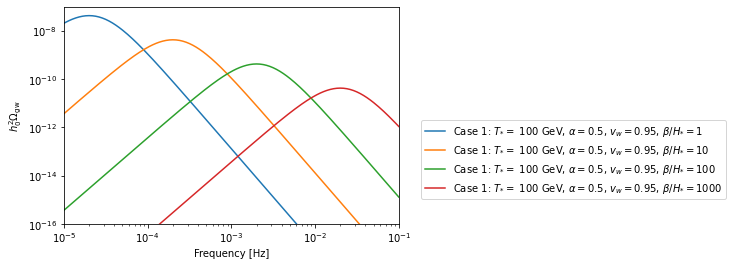

In [8]:
plt.loglog(freqs, Om_100_GeV_case1_top_left, label = r"Case 1: $T_{*}=$ 100 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=1$")
plt.loglog(freqs, Om_100_GeV_case1_top_right, label = r"Case 1: $T_{*}=$ 100 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=10$")
plt.loglog(freqs, Om_100_GeV_case1_bottom_left, label = r"Case 1: $T_{*}=$ 100 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=100$")
plt.loglog(freqs, Om_100_GeV_case1_bottom_right, label = r"Case 1: $T_{*}=$ 100 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=1000$")

plt.xlim(1e-5,0.1)
plt.ylim(1e-16, 1e-7)
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$h_{0}^{2}\Omega_{\rm gw}$")

plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.show()

0.0001116987
0.0001148153621496884


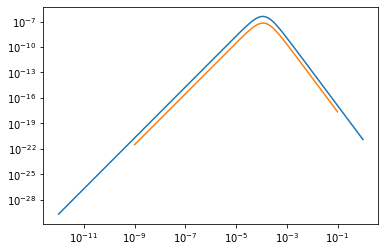

In [9]:
f_alex,Om_alex = np.transpose(np.loadtxt("./Alex_Jenkins_PI_curves_arXiv_2202.00178/fopt-200GeV.txt", skiprows=1)) 
print(f_alex[np.argmax(Om_alex)])
Om_case1_alex_jenkins = SGWB_FOPT_sw(f=freqs, H_star=1, beta=3, kappa_v=1, alpha=1, g_star=106.75, v_w=1, T_star=200)
print(freqs[np.argmax(Om_case1_alex_jenkins)])
plt.loglog(f_alex,Om_alex*0.6766**2)
plt.loglog(freqs, Om_case1_alex_jenkins, label = r"Case 1: $T_{*}=$ 200 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=1$")
plt.show()

1.1404e-07
1.0471285480508985e-07


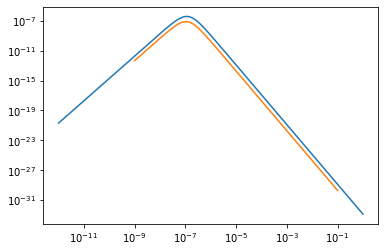

In [10]:
f_alex,Om_alex = np.transpose(np.loadtxt("./Alex_Jenkins_PI_curves_arXiv_2202.00178/fopt-200MeV.txt", skiprows=1)) 
print(f_alex[np.argmax(Om_alex)])
Om_case1_alex_jenkins = SGWB_FOPT_sw(f=freqs, H_star=1, beta=3, kappa_v=1, alpha=1, g_star=61.75, v_w=1, T_star=0.2)
print(freqs[np.argmax(Om_case1_alex_jenkins)])
plt.loglog(f_alex,Om_alex*0.6766**2)
plt.loglog(freqs, Om_case1_alex_jenkins, label = r"Case 1: $T_{*}=$ 200 GeV, $\alpha=0.5$, $v_{w}=0.95$, $\beta/H_{*}=1$")
plt.show()

0.0020892961308540407 5.375943967019174e-12


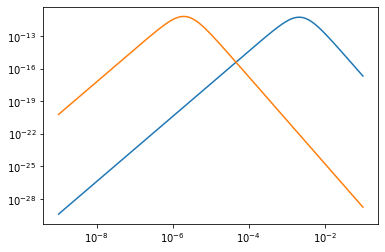

In [11]:
Om_LISA_cosmo_paper = SGWB_FOPT_sw(f=freqs, H_star=1, beta=50, kappa_v=1, alpha=0.1, g_star=100, v_w=0.9, T_star=200)
Om_LISA_cosmo_paper_MeV = SGWB_FOPT_sw(f=freqs, H_star=1, beta=50, kappa_v=1, alpha=0.1, g_star=61.75, v_w=0.9, T_star=0.2)
print(freqs[np.argmax(Om_LISA_cosmo_paper)], np.max(Om_LISA_cosmo_paper))
plt.loglog(freqs, Om_LISA_cosmo_paper)
plt.loglog(freqs, Om_LISA_cosmo_paper_MeV)
plt.show()

3.8018939632056124e-05 3.4673685045253164e-08


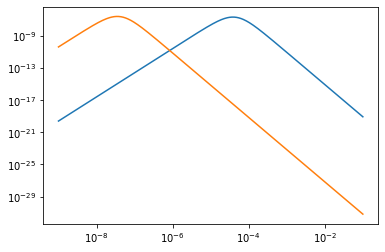

In [12]:
Om_for_thesis_GeV = SGWB_FOPT_sw(f=freqs, H_star=1, beta=1, kappa_v=1, alpha=1, g_star=106.75, v_w=1, T_star=200)
Om_for_thesis_MeV = SGWB_FOPT_sw(f=freqs, H_star=1, beta=1, kappa_v=1, alpha=1, g_star=61.75, v_w=1, T_star=0.2)

print(freqs[np.argmax(Om_for_thesis_GeV)], freqs[np.argmax(Om_for_thesis_MeV)])

plt.loglog(freqs, Om_for_thesis_GeV)
plt.loglog(freqs, Om_for_thesis_MeV)
plt.show()

## PBH: early and late

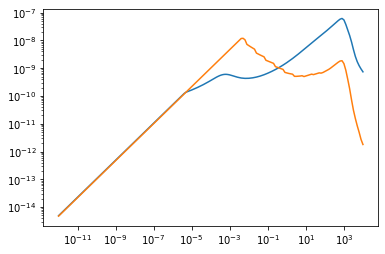

In [13]:
PBH_early = np.load("SGWB_PBH_early_binaries_for_thesis.npz")
PBH_late = np.load("SGWB_PBH_late_binaries_for_thesis.npz")

plt.loglog(PBH_early["freqs"], PBH_early["om_early_97"])
plt.loglog(PBH_late["freqs"], PBH_late["om_late_97"])
plt.show()

# Landscape plot for the Thesis

In [14]:
import matplotlib

In [15]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize-5,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

In [16]:
freqs_inflation = np.logspace(np.log10(3.4e-19),4, 251)
Om_red_f = Om_gw_inflation(f=freqs_inflation, r=0.07, n_T=-0.07/8, P_R = 2e-9, k_star = 0.05/mpc_to_m, a0=1.)

freqs_FOPT_sw = np.logspace(-11, 0, 111)
Om_for_thesis_GeV = SGWB_FOPT_sw(f=freqs_FOPT_sw, H_star=1, beta=1, kappa_v=1, alpha=1, g_star=106.75, v_w=1, T_star=200)
#SGWB_FOPT_sw(f=freqs_FOPT_sw, H_star=1, beta=50, kappa_v=1, alpha=0.1, g_star=106.75, v_w=0.9, T_star=200)
Om_for_thesis_MeV = SGWB_FOPT_sw(f=freqs_FOPT_sw, H_star=1, beta=1, kappa_v=1, alpha=1, g_star=61.75, v_w=1, T_star=0.2)
#SGWB_FOPT_sw(f=freqs_FOPT_sw, H_star=1, beta=50, kappa_v=1, alpha=0.1, g_star=61.75, v_w=0.9, T_star=0.2)

freqs_PBH_early = PBH_early["freqs"]
Om_PBH_early = PBH_early["om_early_97"]
freqs_PBH_late = PBH_late["freqs"]
Om_PBH_late = PBH_late["om_late_97"]

f_cosmic_strings, Om_cosmic_strings = np.transpose(np.loadtxt("./Alex_Jenkins_PI_curves_arXiv_2202.00178/cosmic-strings.txt", skiprows=1))

7.731447241094385e-17


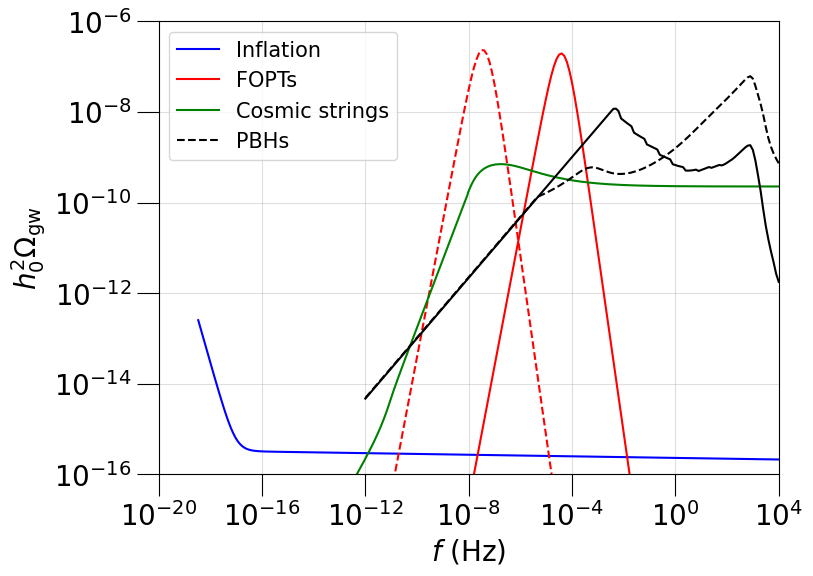

In [17]:
plt.loglog(freqs_inflation, Om_red_f, label = "Inflation", color = "blue")
plt.loglog(freqs_FOPT_sw,Om_for_thesis_GeV, label = "FOPTs", color = "red")
plt.loglog(freqs_FOPT_sw, Om_for_thesis_MeV, color = "red", linestyle="dashed")
plt.loglog(f_cosmic_strings, Om_cosmic_strings*0.6766**2, label = "Cosmic strings", color = "green")
plt.loglog(freqs_PBH_early, Om_PBH_early, color = "black", label = "PBHs", linestyle="dashed")
plt.loglog(freqs_PBH_late, Om_PBH_late, color = "black")

plt.xlim(1e-20, 1e4)
plt.ylim(1e-16, 1e-6)
plt.xlabel(r"$f$ (Hz)")
plt.ylabel(r"$h_{0}^{2}\Omega_{\rm gw}$")
plt.grid(alpha = 0.4)
plt.legend()
plt.savefig("./Cosmo_SGWB_landscape.pdf", bbox_inches="tight")
plt.show()